# **Logistic Regression**
`Logistic Regression` ia a `classification algorithem` used to assign observation toa discreate set of classes.unlike linear regression which output is a continous number values logistic regression transform its output using the `logistic sigmoid function` to return the `probelity` value which can them be mapped to two or more discreate classes.\
`Logistic regression is used for`:
1. Binary Classification
2. Multi Classification
3. One vs Rest Classification

# Assumtion Of Logistic Regression
1. The Dependent variable must be categorical in nature
2. The independent variable(feature) must be independent
3. There should be no outlier in the data.check outlier
4. There should be not high correltion in the independent variables.this can be checked using correlation metrix

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,precision_score,recall_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# before the model impementaion preprocess the data
# remove the deck column
df.drop('deck',axis=1,inplace=True)
# impute the misssing values of age and fare with median
df['age'] = df['age'].fillna(df['age'].median(),inplace=True)
df['fare'] = df['fare'].fillna(df['fare'].median(),inplace=True)
# impute the missing values of emabrak and embarked town
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
# encode the categorical variable using for loop where data type is object or categorical
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_8252\2250236669.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'] = df['age'].fillna(df['age'].median(),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8252\2250236669.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,0,1,0,0,0,2,1,True,0,0,False
1,1,1,0,0,1,0,0,0,0,2,False,0,1,False
2,1,3,0,0,0,0,0,0,2,2,False,0,1,True
3,1,1,0,0,1,0,0,0,0,2,False,0,1,False
4,0,3,1,0,0,0,0,0,2,1,True,0,0,True


In [9]:
# split the data into x and y
X = df.drop('survived',axis=1)
y = df['survived']

In [10]:
# using the train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
# call the model 
model = LogisticRegression()

In [12]:
# fit the model
model.fit(X_train,y_train)

LogisticRegression()

In [13]:
# predict the values
y_pred = model.predict(X_test)

In [14]:
# evaluate the model
print('accuracy_score',accuracy_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report : \n',classification_report(y_test,y_pred))

accuracy_score 1.0
recall_score 1.0
precision_score 1.0
f1_score 1.0
confusion_matrix :
 [[115   0]
 [  0  64]]
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

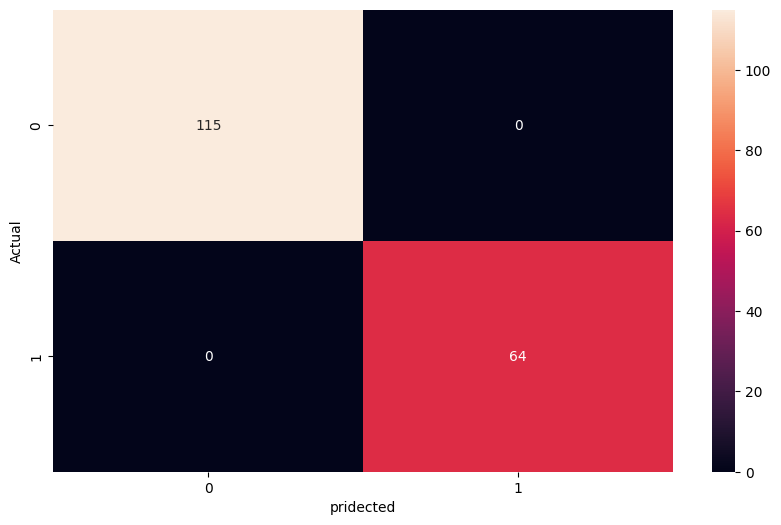

In [20]:
# plot the confution metrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True)
plt.xlabel('pridected')
plt.ylabel('Actual')

In [19]:
# save the model
import pickle
pickle.dump(model, open('./saved_models/02_logistic_regression.pkl','wb'))